In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
import wget
import zipfile
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [31]:
url = "https://storage.googleapis.com/didow-ml-datasets/a-z-handwritten-data.zip"
if not os.path.exists('a-z-handwritten-data.zip'):
    filename = wget.download(url)

In [32]:
local_zip = 'a-z-handwritten-data.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./Dataset/')
zip_ref.close()

In [33]:
data = pd.read_csv('Dataset/A_Z Handwritten Data.csv')

In [34]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data_labels = np.array(data.iloc[:,0].values)
data_letters = np.array(data.iloc[:,1:].values)

In [36]:
def reshape_normalize(data):
    data = data / 255.0
    data = data.reshape(len(data), 28, 28, 1)
    return data

In [37]:
x_train, x_test, y_train, y_test = train_test_split(data_letters,
                                                  data_labels,
                                                  test_size=0.2,
                                                  random_state=42)

In [38]:
x_train = reshape_normalize(x_train)
x_test = reshape_normalize(x_test)

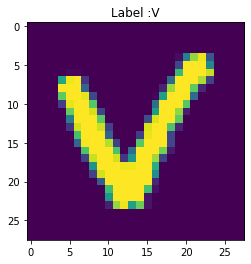

In [39]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def show_image(image, label):
    image = image.reshape([28, 28])
    plt.title('Label :' + letters[label])
    plt.imshow(image)

n = random.randint(0, len(x_train))
show_image(x_train[n], y_train[n])

In [40]:
y_train = np_utils.to_categorical(y_train, 26)
y_test = np_utils.to_categorical(y_test, 26)

In [41]:
print('training set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)


training set:  (297960, 28, 28, 1) (297960, 26)
test set:  (74490, 28, 28, 1) (74490, 26)


In [42]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [43]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 20, verbose=1)

Epoch 1/20
7449/7449 [==============================] - 22s 3ms/step - loss: 0.3230 - accuracy: 0.9043 - val_loss: 0.1203 - val_accuracy: 0.9653
Epoch 2/20
7449/7449 [==============================] - 19s 3ms/step - loss: 0.1485 - accuracy: 0.9564 - val_loss: 0.0947 - val_accuracy: 0.9727
Epoch 3/20
7449/7449 [==============================] - 19s 3ms/step - loss: 0.1213 - accuracy: 0.9643 - val_loss: 0.0828 - val_accuracy: 0.9762
Epoch 4/20
7449/7449 [==============================] - 19s 3ms/step - loss: 0.1062 - accuracy: 0.9685 - val_loss: 0.0789 - val_accuracy: 0.9768
Epoch 5/20
7449/7449 [==============================] - 19s 3ms/step - loss: 0.0978 - accuracy: 0.9711 - val_loss: 0.0708 - val_accuracy: 0.9797
Epoch 6/20
7449/7449 [==============================] - 19s 3ms/step - loss: 0.0911 - accuracy: 0.9730 - val_loss: 0.0663 - val_accuracy: 0.9813
Epoch 7/20
7449/7449 [==============================] - 19s 2ms/step - loss: 0.0864 - accuracy: 0.9744 - val_loss: 0.0750 - val_ac

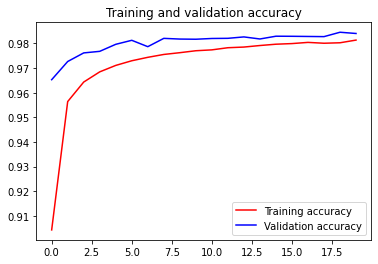

<Figure size 432x288 with 0 Axes>

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

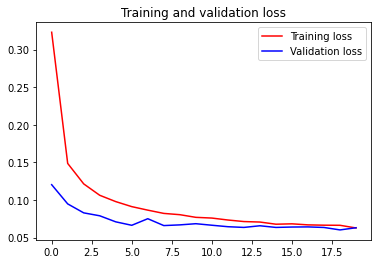

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [46]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

2328/2328 - 3s - loss: 0.0611 - accuracy: 0.9842 - 3s/epoch - 1ms/step
Test Loss:  0.06113559007644653
Test Accuracy:  0.9841723442077637


In [47]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
list_letters = []
for i in range(len(y_test)):
    ltr = letters[np.argmax(y_test[i])]
    if ltr == 'T':
        list_letters.append(i)

1/1 [==============================] - 0s 12ms/step


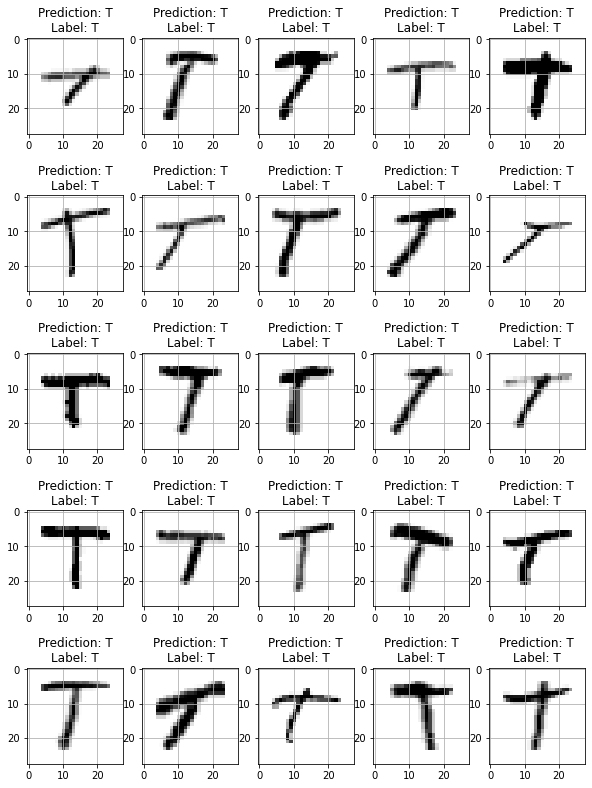

In [61]:
fig, axes = plt.subplots(5,5, figsize=(10,14))
axes = axes.flatten()

for i,ax in enumerate(axes):
    n = list_letters[i]
    img = np.reshape(x_test[n], (28,28))
    # img = np.fliplr(img)
    # img = np.rot90(img)
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = letters[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: {}\nLabel: {}".format(pred,letters[np.argmax(y_test[n])]))
    ax.grid()

In [62]:
model_version = '5'
model_name = 'az_handwritten'
save_path = "./Model/{}/{}".format(model_name, model_version)
model.save(save_path)

INFO:tensorflow:Assets written to: ./Model/az_handwritten/5\assets


INFO:tensorflow:Assets written to: ./Model/az_handwritten/5\assets


In [51]:
# save_path = "./Model/{}/{}/{}".format(model_name, model_version, file_name)
# tf.saved_model.save(model, save_path)
